In [1]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel

In [2]:
# GUI

curr_options = ["None", "SINGLEPULSE", "PULSEDDYNAMIC", "PULSED"]
curr_amps = ["A", "mA"]
ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
incs = [1,2,5,10]

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
Label(root, text = "Filename(s) (Please have same first letters if multiple datasheets)").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# For Thermal Data

Label(root, text = "Reference Temperature (°C) (Thermal)").grid(row = 5, sticky = W)

# For Electrical Data
Label(root, text = "Set Temperature (°C) (Electrical)").grid(row = 6, sticky = W)


# General Info
# Label(root, text = "Current Info (A or mA)").grid(row = 8, sticky = W)
# Label(root, text = "Current Source Type (Select None if SP, CW, PWM1, and PWM2)").grid(row = 9, sticky = W)

# Output Info
Label(root, text = "Output Folder Location").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# Range for Thermal and Electrical
Label(root, text = "Temperature Range (°C)").grid(row = 13, sticky = W)
Label(root, text = "Current Range (A)").grid(row = 15, sticky = W)

# # of Bins
Label(root, text = "Increments for Temperature Ticks (Default - Increments of 10°C)").grid(row = 14, sticky = W)
Label(root, text = "Increments for Current Ticks (Default - Increments of 1A)").grid(row = 16, sticky = W)

# What order
Label(root, text = "Order (Ex: 1=Linear)").grid(row = 17, sticky = W)
# Show points or no
Label(root, text = "Show Points?").grid(row = 18, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 19, sticky = W)

# Directory
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, '')
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
e1 = ttk.Entry(root)
e1.insert(0, "CFM-50X-B-Y11-20210810")
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")
# Temps & Amps

e4 = ttk.Entry(root)
e4.insert(0, 40)
e5 = ttk.Entry(root)
e5.insert(0, 40)


# Dropdown menu
# e7 = StringVar(root)
# e7.set(curr_amps[0])
# drops = OptionMenu(root,e7,*curr_amps)

# Dropdown menu
#e8 = StringVar(root)
#e8.set(curr_options[0])
#drop = ttk.OptionMenu(root,e8,*curr_options)

# Output directory
e9 = ttk.Entry(root)
e9.insert(0, 'output')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Range for Thermal and Electrical
g1a = ttk.Entry(root)
g1a.insert(0, 20)
g1b = ttk.Entry(root)
g1b.insert(0, 90)
g2a = ttk.Entry(root)
g2a.insert(0, 0)
g2b = ttk.Entry(root)
g2b.insert(0, 30)

# Dropdown menu
g3 = StringVar(root)
g3.set(incs[3])
g3x = OptionMenu(root,g3,*incs)

# Dropdown menu
g4 = StringVar(root)
g4.set(incs[2])
g4x = OptionMenu(root,g4,*incs)


# Dropdown menu
g5 = StringVar(root)
g5.set(ordr[1])
g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
g6 = StringVar(root)
g6.set(t_f[0])
g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
#e3.grid(row = 4, column = 1)
e4.grid(row = 5, column = 1)
e5.grid(row = 6, column = 1)
#e6.grid(row = 7, column = 1)
# drops.grid(row = 8, column = 1)
#drop.grid(row = 9, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

g1a.grid(row = 13, column = 1)
g1b.grid(row = 13, column = 2)
g2a.grid(row = 15, column = 1)
g2b.grid(row = 15, column = 2)
g3x.grid(row = 14, column = 1)
g4x.grid(row = 16, column = 1)
g5x.grid(row = 17, column = 1)
g6x.grid(row = 18, column = 1)
g7x.grid(row = 19, column = 1)

def getInput():

    a = e0.get()
    b = e1.get()
    c = e2.get()
    #d = int(e3.get())
    e = int(e4.get())
    f = int(e5.get())
    #g = int(e6.get())
    # h = e7.get()
    #i = e8.get()
    j = e9.get()
    k = e10.get()
    l = int(g1a.get())
    m = int(g1b.get())
    n = int(g2a.get())
    o = int(g2b.get())
    p = int(g3.get())
    q = int(g4.get())
    r = int(g5.get())
    s = g6.get()
    t = g7.get()
    root.destroy()

    global overall
    overall = [a,b,c,e,f,j,k,l,m,n,o,p,q,r,s,t]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [3]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [4]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files * Please use forward slashes
name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[2]  # If reading in multiple files - they all have to be the same file type

# For thermal Data
#set_current = overall[3]  # default: 6
ref_temp = overall[3]

# For electrical data
set_temp = overall[4]
#ref_current = overall[6]  # default: 6

# General info
# current_info = overall[7] # A or mA
#pulse_width = overall[7]  # typically single pulse

# Output info
output_f = overall[5]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward

# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[6]))

In [5]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Comment', 'Source mode - Currentsource', 'Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 
               'Voltage  - Currentsource / V', 'Radiometric / W', 
         'Photometric / lm', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
         'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 'CCT / K', 'CRI', 'Red Effect / %', 'Width50 / nm']


# 'Last Dark Current / min', 'Signal Level / Counts', 'Signal Level / %', 'Scotopic / lm', 'UVA / W', 'UVB / W', 'UVC / W', 
# 'VIS / W', 'Tristimulus_X / lm', 'Tristimulus_Y / lm', 'Tristimulus_Z / lm', 'z - Color Coordinates', 'u - Color Coordinates', 
# 'v1960 - Color Coordinates', 'v1976 - Color Coordinates', 'CRI', 'Red Effect / %', 'Vis Effect / %', 'CCT / K',


# Original name for temperature column
cols_temp = 'Set Temperature - LED870 / °C'
# Original name for current column
cols_curr = 'Source current - Currentsource / A'
# Original name for pulse column
cols_puls = 'Source mode - Currentsource' # Don't add pulse column into renamed area as it gets dropped


# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
        #    'Dominant Wavelength / nm', 'Centroid Wavelength / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

column_rn = ['Serial Number', 'Δ Forward Voltage (Vf)', 'Δ CIEx', 'Δ CIEy', 'Δ Peak Wavelength (λp)', 'Δ Centroid Wavelength (λcen)', 
             'Δ Dominant Wavelength (λd)', 'Δ CCT / K', 'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiant Power', 'Relative Luminous Flux', 
             'Tj (°C)', 'lf (A)', 'Drive Condition']


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [6]:
# IMPORTANT - OUTPUT
# Select columns here - this is what outputs the graphs
# Add more columns & titles here if necessary

# Renamed name of temperature and current column
xt = 'Tj (°C)'
xc = 'lf (A)'

y1 = 'Relative Radiant Power'
y1n = 'Radiant'
y1tt = 'Relative Radiant Power  vs. Tj'
y1te = 'Relative Radiant Power vs. lf'

y2 = 'Relative Luminous Flux'
y2n = 'Luminous'
y2tt = 'Relative Luminous Flux  vs. Tj'
y2te = 'Relative Luminous Flux vs. lf'

y3 = 'Δ Forward Voltage (Vf)'
y3n = 'd_Vf'
y3tt = 'ΔVf vs. Tj'
y3te = 'ΔVf vs. lf'

y4 = 'Δ Peak Wavelength (λp)'
y4n = 'd_Lpk'
y4tt = 'Peak Wavelength'
y4te = 'Peak Wavelength'

'''
y5 = 'Δ Dominant Wavelength (λd)'
y5n = 'd_Ldom'
y5tt = 'Dominant Wavelength'
y5te = 'Dominant Wavelength'

y6 = 'Δ Centroid Wavelength (λcen)'
y6n = 'd_Lcen'
y6tt = 'Cen Wavelength'
y6te = 'Cen Wavelength'

y7 = 'Δ CCT / K'
y7n = 'd_CCT'
y7tt = 'CCT / K'
y7te = 'CCT / K'

y8 = 'Δ CRI'
y8n = 'd_CRI'
y8tt = 'CRI'
y8te = 'CRI'

y9 = 'Δ R 9'
y9n = d_R9
y9tt = 'R 9'
y9te = 'R 9'

y10 = 'Δ FWHM'
y10n = 'd_FWHM'
y10tt = 'FWHM'
y10te = 'FWHM'

# CIEx & y column names here:
y11 = 'Δ CIEx'
y11n = 'd_CIEx'
y11tt = 'Chromaticity Shift vs. Tj \n ΔCIEx = CIEx(Tj) - CIEx(' + str(ref_temp) + '¡C)  ' + ' If = ' + str(set_current) + 'A'
y11te = 'Chromaticity Shift vs. lf \n ΔCIEx = CIEx(lf) - CIEx(' + str(ref_current) + 'A)  ' + ' Tj = ' + str(set_temp) + '°C'

y12 = 'Δ CIEy'
y12n = 'd_CIEy'
y12tt = 'Chromaticity Shift vs. Tj \n ΔCIEy = CIEy(Tj) - CIEy(' + str(ref_temp) + '¡C)  ' + ' If = ' + str(set_current) + 'A'
y12te = 'Chromaticity Shift vs. lf \n ΔCIEy = CIEy(lf) - CIEy(' + str(ref_current) + 'A)  ' + ' Tj = ' + str(set_temp) + '°C'

'''

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4]
y_fn = [y1n,y2n,y3n,y4n]
y_nt = [y1tt,y2tt,y3tt,y4tt]
y_ne = [y1te,y2te,y3te,y4te]

row_size = 2 # Make sure row and column size can accomodate all the subplots
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1)] # the axes for the subplots

# ALSO - change x range if necessary
# Thermal by default is 20-90 Celsius
xt1 = overall[7]
xt2 = overall[8]

# Electrical by default is 0-10 Amps
xe1 = overall[9]
xe2 = overall[10]

# Number of bins for therm and elect
t_bins = overall[11]
e_bins = overall[12]

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
ord_num = overall[13]

# Show points or no?
show_pt = bool(strtobool(overall[14]))

# Export as Excel Worksheet or no?
exp = bool(strtobool(overall[15]))

In [7]:
# Change directory
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents')

In [8]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [9]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if (f.startswith(name) and f.lower().endswith(file_type))]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files
df

,Number,Comment,Integration Time / ms,Averages,Filter,Serial Number,CCD Temperature,DC Temperature,Last Dark Current / min,Signal Level / Counts,...,Zhaga flux category,Zhaga book 1 flux category,Desktop,Tolerance Time - LED870 / s,Voltage - LED870 / V,Current - LED870 / A,Currentsource,Control mode - Currentsource,Compliance - Currentsource / V,Voltage range - Currentsource / V
0,1,SP-B-10063112049,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,7.5,25145,...,NaN,350,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.08,-0.84,Vektrex_SN3800-1462,Triggered,30,30
1,2,SP-B-10063112049,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,7.8,40237,...,C006,500,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-1.94,-0.75,Vektrex_SN3800-1462,Triggered,30,30
2,3,SP-B-10063112049,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,8.0,50764,...,C006,500,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.04,-0.83,Vektrex_SN3800-1462,Triggered,30,30
3,4,SP-B-10063112049,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,9.4,57878,...,C008,800,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.04,-0.86,Vektrex_SN3800-1462,Triggered,28,28
4,5,SP-B-10063112049,15,1,OD3,026214418;18-0762,-10.61 °C,-10.61 °C,14.1,6472,...,C008,"800, 1000",C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-1.96,-0.77,Vektrex_SN3800-1462,Triggered,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1,PWM2-B-1006314016,15,1,OD3,026214418;18-0762,-10.61 °C,-10.61 °C,6.7,2249,...,NaN,"250, 350",C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-15.07,-4.80,Vektrex_SN3800-1462,Triggered,20,20
563,2,PWM2-B-1006314016,15,1,OD3,026214418;18-0762,-10.61 °C,-10.61 °C,6.9,3362,...,NaN,500,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-14.82,-4.64,Vektrex_SN3800-1462,Triggered,20,20
564,3,PWM2-B-1006314016,15,1,OD3,026214418;18-0762,-10.61 °C,-10.61 °C,7.1,4150,...,C006,500,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-14.91,-4.66,Vektrex_SN3800-1462,Triggered,20,20
565,4,PWM2-B-1006314016,15,1,OD3,026214418;18-0762,-10.61 °C,-10.61 °C,7.3,4668,...,"C006, C008","500, 800",C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-14.89,-4.76,Vektrex_SN3800-1462,Triggered,20,20


In [10]:
# Double check if imported worksheets are not empty - if empty, script is killed

if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [11]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [12]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df['Comment'] = df['Comment'].astype(str)
df = df[df['Set Temperature - LED870 / °C'] != 45]
df['Color'] = df['Comment'].str.split('-').str.get(1)
first_column = df.pop('Color')
df.insert(0, 'Color', first_column)
color = list(df['Color'].unique())
color = color[0]

df['Comment Spec'] = df['Comment'].str.split('-').str.get(0)
first_column = df.pop('Comment Spec')
df.insert(0, 'Comment Spec', first_column)
#df = df.reset_index()

df = df.dropna()
#df

In [13]:
# GUI for Inputting Unique Amps for each Drive Condition

cond_uniq = list(df['Comment Spec'].unique())
cond_uniq.sort()

root = ThemedTk(theme='adapta')
root.title("GUI")

# Output list of Drive Conditions
Label(root, text = ' ').grid(row = 1, sticky = W)
Label(root, text = 'Set Current (A) (Thermal)').grid(row = 1, column = 1, sticky = W)
Label(root, text = 'Reference Current (A) (Electrical)').grid(row = 1, column = 2, sticky = W)
Label(root, text = cond_uniq[0]).grid(row = 2, sticky = W)
Label(root, text = cond_uniq[1]).grid(row = 3, sticky = W)
Label(root, text = cond_uniq[2]).grid(row = 4, sticky = W)
Label(root, text = cond_uniq[3]).grid(row = 5, sticky = W)

c1a = ttk.Entry(root)
c1a.insert(0, 12.5)
c2a = ttk.Entry(root)
c2a.insert(0, 12.5)
c1b = ttk.Entry(root)
c1b.insert(0, 20)
c2b = ttk.Entry(root)
c2b.insert(0, 20)
c1c = ttk.Entry(root)
c1c.insert(0, 20)
c2c = ttk.Entry(root)
c2c.insert(0, 20)
c1d = ttk.Entry(root)
c1d.insert(0, 20)
c2d = ttk.Entry(root)
c2d.insert(0, 20)

c1a.grid(row = 2, column = 1)
c2a.grid(row = 2, column = 2)
c1b.grid(row = 3, column = 1)
c2b.grid(row = 3, column = 2)
c1c.grid(row = 4, column = 1)
c2c.grid(row = 4, column = 2)
c1d.grid(row = 5, column = 1)
c2d.grid(row = 5, column = 2)

def getInput():

    a = float(c1a.get())
    b = float(c2a.get())
    c = float(c1b.get())
    d = float(c2b.get())
    e = float(c1c.get())
    f = float(c2c.get())
    g = float(c1d.get())
    h = float(c2d.get())
    root.destroy()

    global cond
    cond = [a,b,c,d,e,f,g,h]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [14]:
# Check for any zeros

xdl = []
xd = df[(df.iloc[:,5:8] == 0).any(axis=1)]
for i in xd['Comment'].unique():
    xdl.append(i)

if not xd.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations with zeros which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=xd,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'Please double-check these serial numbers - ' + str(xdl) + '\n The rows will be dropped.', 0)

In [15]:
# Drop any rows that have 0s
indices = df.loc[(df.iloc[:,5:8] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
    
# Check if dataframe is empty
if df.empty:
    Mbox('Error!', 'The dataframe is empty', 0)
    sys.exit() # Kill script

In [16]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage  - Currentsource / V'] >= 200]
df = df[df['Voltage  - Currentsource / V'] < 200]
if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

In [17]:
# Get groupby means for normalization
cols = df.columns.drop(['Comment Spec', 'Color', 'Comment', 'Source mode - Currentsource'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df = df.groupby(['Comment', 'Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 'Comment Spec']).mean().reset_index()
#df

In [18]:
cw = df[df['Comment Spec'] == 'CW']
pwm1 = df[df['Comment Spec'] == 'PWM1']
pwm2 = df[df['Comment Spec'] == 'PWM2']
sp = df[df['Comment Spec'] == 'SP']

In [19]:
cond

[12.5, 12.5, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]

In [20]:
# Filtering for thermal data and electrical data (identify set amps / temp)

# Set Amps = 6 A (Thermal Data)
cw_set = cw[cw[cols_curr] == cond[0]]
pwm1_set = pwm1[pwm1[cols_curr] == cond[2]]
pwm2_set = pwm2[pwm2[cols_curr] == cond[4]]
sp_set = sp[sp[cols_curr] == cond[6]]
therm = pd.concat([cw_set, pwm1_set, pwm2_set, sp_set])
therm = therm.reset_index(drop=True)

# Set Temp = 40 C (Electrical Data)
elect = df[df[cols_temp] == set_temp]
elect = elect.reset_index(drop=True)

# If set temp/current doesn't exist, kill script and show error
if therm.empty or elect.empty:
    Mbox('Error!', 'Please double-check if selected set temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

#therm

In [21]:
# Create column 'mean' as baseline

# Thermal
thermx = therm[therm[cols_temp] == ref_temp]
#thermx.loc['mean'] = thermx.mean()
#last_row = thermx.tail(1)
#therm = therm.append(last_row)
#therm.tail()

In [22]:
# Calculations

test = (therm.set_index('Comment').iloc[:,[3,6,7,8,9,10,11,12,13,14]]-thermx.set_index('Comment').iloc[:,[3,6,7,8,9,10,11,12,13,14]]
        .reindex(therm['Comment'])).dropna(axis=0).reset_index()
test2 = (therm.set_index('Comment').iloc[:,[4,5]] / thermx.set_index('Comment').iloc[:,[4,5]]
                .reindex(therm['Comment'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
thermz = pd.concat([test, test2, therm.iloc[:,1:4]], axis=1)

In [23]:
# Electrical

cw_el = elect[(elect['Comment Spec'] == 'CW') & (elect[cols_curr] == cond[1])]
pwm1_el = elect[(elect['Comment Spec'] == 'PWM1') & (elect[cols_curr] == cond[3])]
pwm2_el = elect[(elect['Comment Spec'] == 'PWM2') & (elect[cols_curr] == cond[5])]
sp_el = elect[(elect['Comment Spec'] == 'SP') & (elect[cols_curr] == cond[7])]

electx = pd.concat([cw_el, pwm1_el, pwm2_el, sp_el])
#electx.loc['mean'] = electx.mean()
#last_row = electx.tail(1)
#elect = elect.append(last_row)
#elect.tail()

In [24]:
# Calculations

test = (elect.set_index('Comment').iloc[:,[3,6,7,8,9,10,11,12,13,14]]-electx.set_index('Comment').iloc[:,[3,6,7,8,9,10,11,12,13,14]]
        .reindex(elect['Comment'])).dropna(axis=0).reset_index()
test2 = (elect.set_index('Comment').iloc[:,[4,5]] / electx.set_index('Comment').iloc[:,[4,5]]
                .reindex(elect['Comment'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
electz = pd.concat([test, test2, elect.iloc[:,1:4]], axis=1)

In [25]:
# If reference temp/current doesn't exist, kill script and show error
if thermx.empty or electx.empty:
    Mbox('Error!', 'Please double-check if selected reference temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [26]:
thermz.columns = column_rn
electz.columns = column_rn

In [27]:
# For horizontal line on graph
thermz_m = thermz[thermz['Tj (°C)'] == ref_temp].iloc[0]
electz_m = electz[electz['Relative Radiant Power'] == 100].iloc[0]

In [28]:
# Change to string
thermz['Serial Number'] = thermz['Serial Number'].astype(str)
electz['Serial Number'] = electz['Serial Number'].astype(str)

In [29]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])

        QtWidgets.QMainWindow.__init__(self)
        title = name + ' - By Serial Number'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [30]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

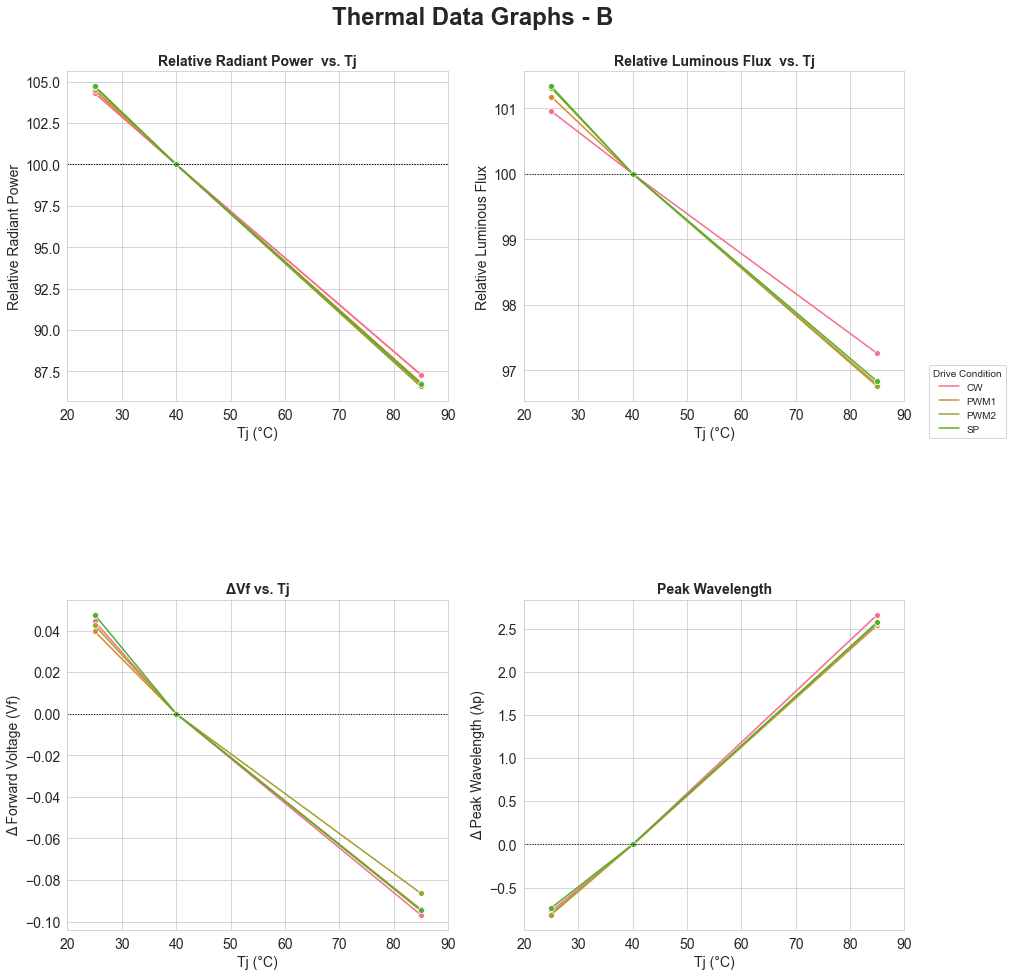

In [31]:
# Thermal - By Drive Condition

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,15))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Thermal Data Graphs - ' + color, fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xt, y=a, hue="Drive Condition", data=thermz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    c.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    #c.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xt, y=y1, hue="Drive Condition", data=thermz, ci=False, marker='o')

axes[0,0].set_title(y1tt, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xt1, xt2))
c1.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c1.axhline(thermz_m[y1] ,ls='dotted', color='black', linewidth=1)
#c1.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.48, 0), ncol=1).set_title('Drive Condition') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

# pass the figure to the custom window
#a = ScrollableWindow(f);

In [32]:
if over == False:
    fname = output_f + '/' + name + '_drive_therm_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_drive_therm.png')

In [33]:
# Individual Thermal Graphs - By Drive Condition
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xt, y=a, hue="Drive Condition", data=thermz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                    aspect = 1.8)

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    #plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
    plt.axvline(xt2, color='0.8')
''';

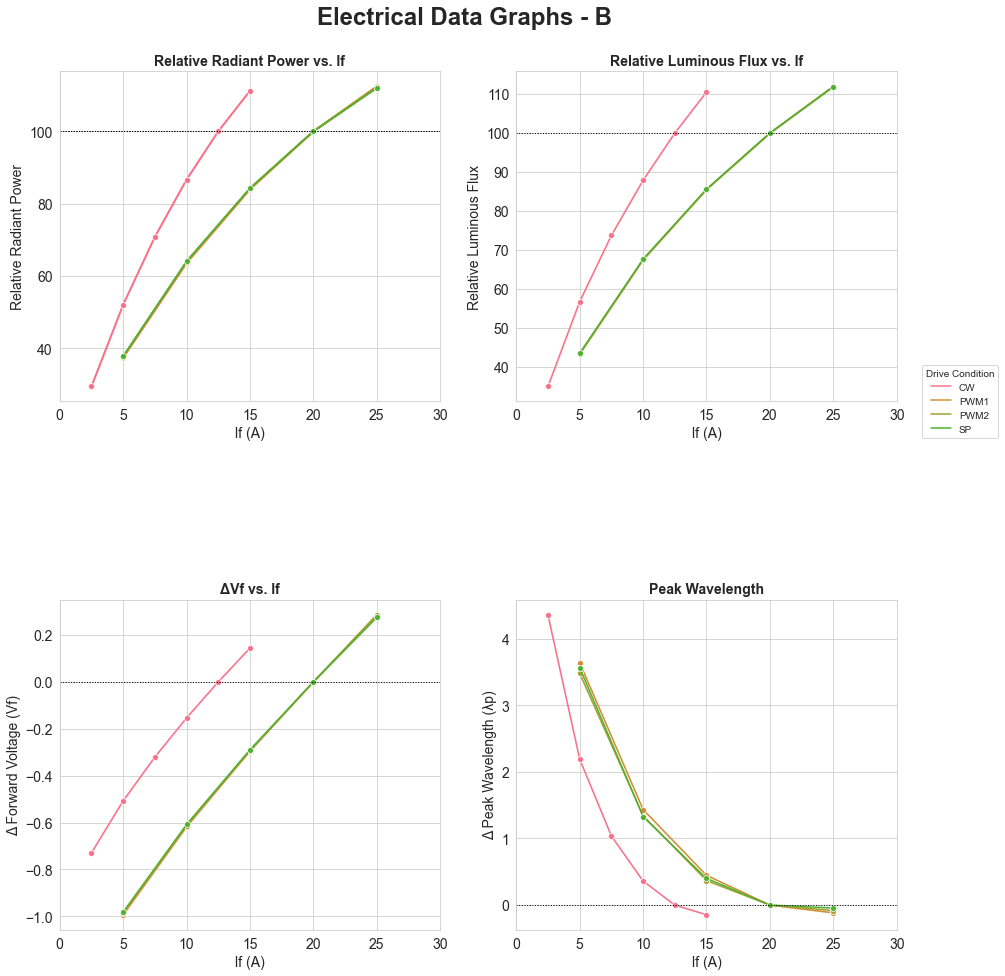

In [35]:
# Electrical - By Drive Condition

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rcParams.update({'font.family':'sans-serif'})

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,15))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Electrical Data Graphs - ' + color, fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_ne, ax_n):

    c = sns.lineplot(ax=axes[d], x=xc, y=a, hue="Drive Condition", data=electz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    c.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    #c.axvline(ref_current, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xc, y=y1, hue="Drive Condition", data=electz, ci=False, marker='o')

axes[0,0].set_title(y1te, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xe1, xe2))
c1.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c1.axhline(electz_m[y1] ,ls='dotted', color='black', linewidth=1)
#c1.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.48, 0), ncol=1).set_title('Drive Condition')
c1.set_zorder(1)

# pass the figure to the custom window
#a = ScrollableWindow(f);

In [36]:
if over == False:
    fname = output_f + '/' + name + '_drive_elect_'
    version_png(fname)
else:
    f.savefig(output_f + '/' + name + '_drive_elect.png')

In [37]:
# Individual Electrical Graphs - By Drive Condition
'''
for (a,b,d) in zip(y_n, y_ne, ax_n):

    c = sns.lmplot(x=xc, y=a, hue="Drive Condition", data=electz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                    aspect = 1.5)

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    #plt.axvline(ref_current, ls='dotted', color='black', linewidth=1)
    plt.axvline(xe2, color='0.8')
''';

In [39]:
#create unique list of names
uniq_spec = df['Comment Spec'].unique()

#create a data frame dictionary to store your data frames
df_dict = {elem : pd.DataFrame for elem in uniq_spec}

for key in df_dict.keys():
    df_dict[key] = df[:][df['Comment Spec'] == key]

In [40]:
# Merge together elect and therm data, and then finally df

zz = pd.concat([thermz, electz])
zz = zz.drop_duplicates()
zz = zz.rename(columns={"Serial Number": "Comment", "Tj (°C)": "Set Temperature - LED870 / °C", 
                   "lf (A)": "Source current - Currentsource / A", "Drive Condition": "Comment Spec"})

result = pd.merge(df, zz, on=["Comment", "Set Temperature - LED870 / °C", "Source current - Currentsource / A", "Comment Spec"]
                 , how = "left") #if keeping only calc values, remove how
result = result.drop_duplicates()

In [41]:
cols = result.columns.tolist()
cols = ['Comment','Set Temperature - LED870 / °C','Source current - Currentsource / A','Comment Spec',
        'Voltage  - Currentsource / V','Δ Forward Voltage (Vf)','Radiometric / W','Relative Radiant Power','Photometric / lm',
        'Relative Luminous Flux','x - Color Coordinates','Δ CIEx','y - Color Coordinates','Δ CIEy','Peak Wavelength / nm',
        'Δ Peak Wavelength (λp)','Centroid Wavelength / nm','Δ Centroid Wavelength (λcen)','Dominant Wavelength / nm',
        'Δ Dominant Wavelength (λd)','CCT / K','Δ CCT / K','CRI','Δ CRI','Red Effect / %','Δ R 9','Width50 / nm','Δ FWHM']
result = result[cols]

In [42]:
# Export as Excel Worksheet if needed

if exp == True:
    with pd.ExcelWriter(output_f + '/' + name + '_output.xlsx') as writer:
        result.to_excel(writer, sheet_name='Original + Calculated', index=False)
        df_dict['SP'].to_excel(writer, sheet_name='Single Pulse', index=False)
        df_dict['CW'].to_excel(writer, sheet_name='CW', index=False)
        df_dict['PWM1'].to_excel(writer, sheet_name='PWM1', index=False)
        df_dict['PWM2'].to_excel(writer, sheet_name='PWM2', index=False)
else:
    pass

In [43]:
# Kills script so appendix doesn't run
sys.exit()

SystemExit: 

# Appendix

In [ ]:
'''

# For viewing a specific column

# Drop-down menu for viewing specific column's graphs

cols = list(therm.columns)
cols = cols[3:]

master = ThemedTk(theme='arc')
master.title("GUI")

ttk.Label(master, text = "Select & View a Specific Column", font=("Arial Bold", 12)).pack()

variable = StringVar(master)
variable.set(cols[0]) # default value

w = ttk.OptionMenu(master, variable, *cols)
w.pack()
    
def kill():
    global select
    select = variable.get()
    master.destroy()
    
ttk.Button(master, text = "OK", command = kill).pack()

master.mainloop()

''';

In [ ]:
#column = select

In [ ]:
'''

# Thermal

plt.figure(name + ' - Thermal Data for ' + column, clear=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
g = sns.lineplot(x = xt, y = column, hue = "Serial Number", data = therm, ci=False)

g.axhline(therm[column]['mean'] ,ls='dotted', color='black', linewidth=1)
g.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
g.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=1).set_title('Serial Number')
g.set(xlim=(xt1,xt2))
g.set(xticks=np.arange(xt1, xt2+0.01, t_bins))

plt.title(str(column) + ' vs. Tj \n By Serial Number - ' + str(pulse_width).title() + ' lf = ' + str(set_current) + 'A', 
                    fontweight = 'bold')
                    
''';

In [ ]:
'''

# Electrical

plt.figure(name + ' - Electrical Data for ' + column, clear=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
g = sns.lineplot(x = xc, y = column, hue = "Serial Number", data = elect, ci=False)

g.axhline(elect[column]['mean'] ,ls='dotted', color='black', linewidth=1)
g.axvline(ref_current, ls='dotted', color='black', linewidth=1)
g.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=1).set_title('Serial Number')
g.set(xlim=(xe1,xe2))
g.set(xticks=np.arange(xe1, xe2+0.01, e_bins))

plt.title(str(column) + ' vs. lf \n By Serial Number - ' + str(pulse_width).title() + ' Tj = ' + str(set_temp) + '°C', 
                    fontweight = 'bold')
                    
''';